## Bati Bank Credit Risk Analysis - Exploratory Data Analysis

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load Dataset

In [26]:
data = pd.read_csv("E:/data06/data.csv")

### Data Overview

In [27]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [28]:
print(data.describe())

       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


### Check for Missing Values

In [29]:
missing = data.isnull().sum()
print(missing)

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


### Visualize Missing Values

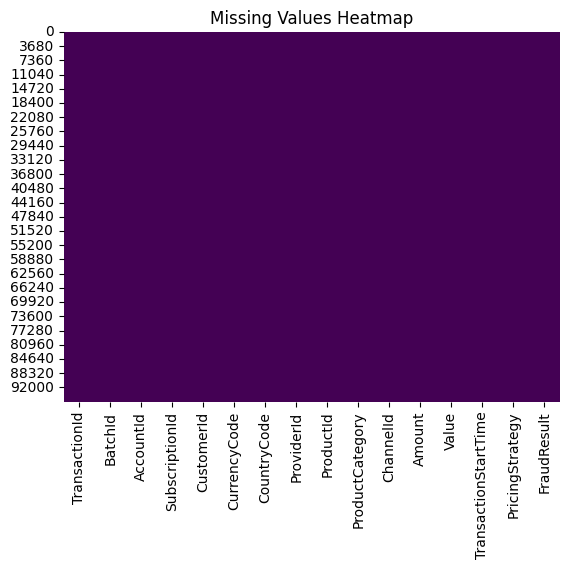

In [30]:
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

### Visualizations
Example: Distribution of Transaction Amounts

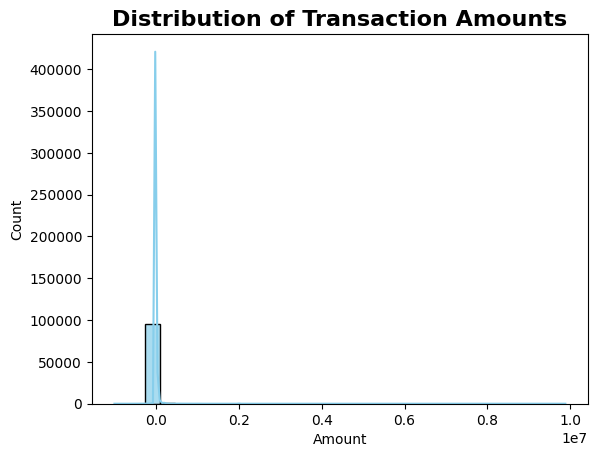

In [31]:
sns.histplot(data['Amount'], kde=True, bins=30, color='skyblue', alpha=0.7)
plt.title("Distribution of Transaction Amounts", fontsize=16, fontweight='bold')

plt.show()

<Axes: title={'center': 'Distribution of Transaction Amounts'}, xlabel='Amount', ylabel='Count'>

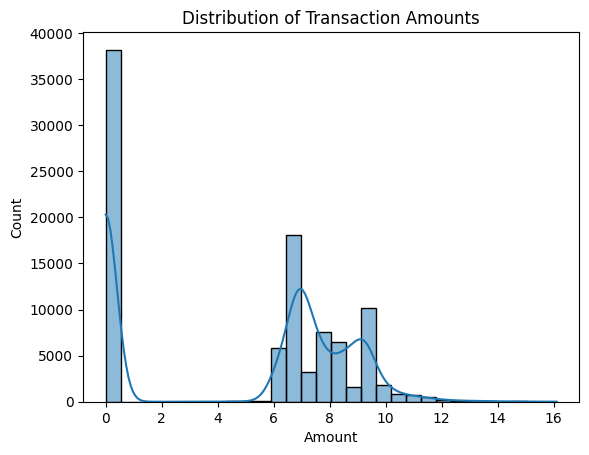

In [32]:
plt.title("Distribution of Transaction Amounts")
sns.histplot(data['Amount'].apply(lambda x: np.log1p(x) if x > 0 else 0), kde=True, bins=30)

### Correlation Matrix

In [33]:
data = pd.read_csv("E:/data06/data.csv")

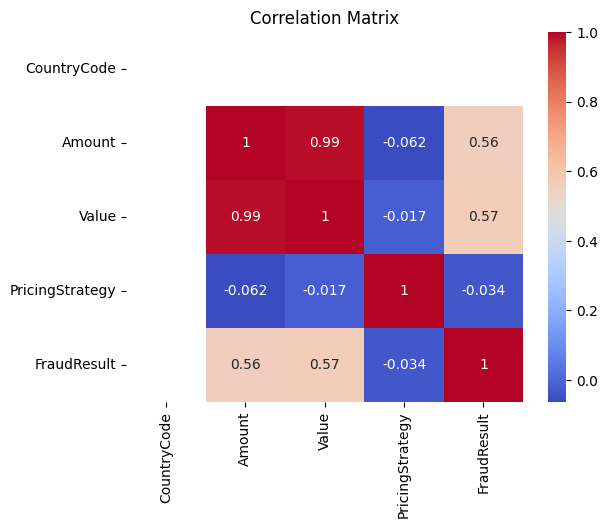

In [36]:
# Select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])

sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()